In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from matplotlib import font_manager, rc
font_path = "BMJUA_ttf.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rc('axes', unicode_minus=False)

In [2]:
spec = pd.read_csv("user_spec.csv")
result = pd.read_csv("loan_result.csv")

In [3]:
merge = pd.merge(result, spec, right_on="application_id", left_on="application_id")

In [4]:
merge.info() #data의 type을 확인하기 위한 코드

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13527250 entries, 0 to 13527249
Data columns (total 23 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   application_id                       int64  
 1   loanapply_insert_time                object 
 2   bank_id                              int64  
 3   product_id                           int64  
 4   loan_limit                           float64
 5   loan_rate                            float64
 6   is_applied                           float64
 7   user_id                              int64  
 8   birth_year                           float64
 9   gender                               float64
 10  insert_time                          object 
 11  credit_score                         float64
 12  yearly_income                        float64
 13  income_type                          object 
 14  company_enter_month                  float64
 15  employment_type               

In [5]:
merge.isnull().sum() #dataframe안에 null값이 얼마나 존재하는지 확인하는 코드

application_id                                0
loanapply_insert_time                         0
bank_id                                       0
product_id                                    0
loan_limit                                 7382
loan_rate                                  7382
is_applied                              3257239
user_id                                       0
birth_year                               128096
gender                                   128096
insert_time                                   0
credit_score                            1509276
yearly_income                                 6
income_type                                   0
company_enter_month                      400337
employment_type                               0
houseown_type                                 0
desired_amount                                0
purpose                                       0
personal_rehabilitation_yn              5888701
personal_rehabilitation_complete_yn    1

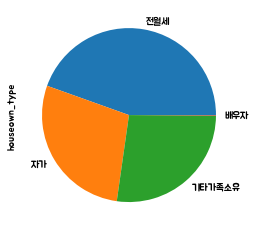

In [6]:
#자가소유 비율
merge['houseown_type'].value_counts().plot(kind='pie')
plt.show()

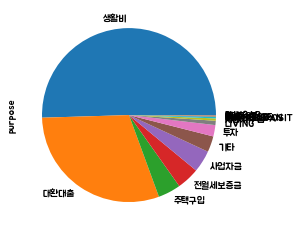

In [7]:
#대출목적 비율
merge['purpose'].value_counts().plot(kind='pie')
plt.show()

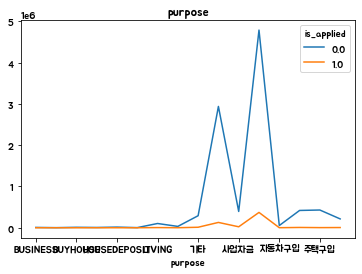

In [8]:
#대출목적과 대출받았는지에 대한 그래프
grape_df = merge.groupby(['purpose','is_applied'])['is_applied'].count().unstack('is_applied')
grape_df.plot()
plt.title('purpose')
plt.show()

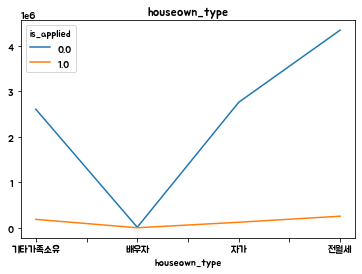

In [9]:
#자가소유와 대출받았는지에 대한 그래프
grape_df = merge.groupby(['houseown_type','is_applied'])['is_applied'].count().unstack('is_applied')
grape_df.plot()
plt.title('houseown_type')
plt.show()

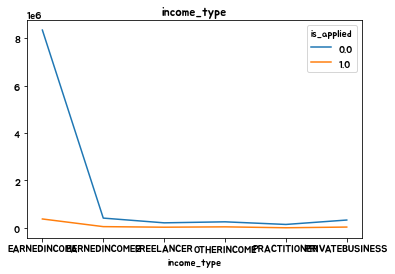

In [10]:
#근로형태와 대출
grape_df = merge.groupby(['income_type','is_applied'])['is_applied'].count().unstack('is_applied')
grape_df.plot()
plt.title('income_type')
plt.show()

In [11]:
#아래는 대출목적 원핫인코딩용

In [12]:
def convert_purpose(data):
    if data == "생활비" or data == "LIVING":
        return 1
    elif data == "대환대출" or data == "SWITCHLOAN":
        return 2
    elif data == "주택구입" or data == "BUYHOUSE":
        return 3
    elif data == "전월세보증금" or data == "HOUSEDEPOSIT":
        return 4
    elif data == "사업자금" or data == "BUSINESS":
        return 5
    elif data == "투자" or data == "INVEST":
        return 6
    elif data == "자동차구입" or data == "BUYCAR":
        return 7
    elif data == "기타" or data == "ETC":
        return 0

In [13]:
merge['purpose'].value_counts() #대출목적 값 확인

생활비             6828706
대환대출            4073362
주택구입             569679
전월세보증금           569284
사업자금             551570
기타               400084
투자               285670
LIVING           107532
자동차구입             58571
SWITCHLOAN        33615
HOUSEDEPOSIT      15912
BUYHOUSE          10989
BUSINESS           8513
ETC                7374
INVEST             3634
BUYCAR             2755
Name: purpose, dtype: int64

In [14]:
#대출목적 원핫인코딩해서 merge_df에 저장
merge['purpose'] = merge['purpose'].apply(convert_purpose)
merge_df = pd.get_dummies(data = merge, columns = ['purpose'], prefix = 'purpose')

In [15]:
#아래는 자가소유 원핫인코딩용

In [16]:
def convert_house(data):
    if data == "전월세":
        return 1
    elif data == "자가":
        return 2
    elif data == "배우자":
        return 3
    elif data == "기타가족소유":
        return 0

In [17]:
merge_df['houseown_type'].value_counts() #자가소유 카운팅

전월세       6024282
자가        3817266
기타가족소유    3672900
배우자         12802
Name: houseown_type, dtype: int64

In [18]:
#자가소유 원핫인코딩 merge_df에 저장
merge_df['houseown_type'] = merge_df['houseown_type'].apply(convert_house)
merge_df = pd.get_dummies(data = merge_df, columns = ['houseown_type'], prefix = 'houseown_type')

In [19]:
#아래는 근로형태 원핫인코딩용

In [20]:
def convert_income(data):
    if data == "EARNEDINCOME":
        return 1
    elif data == "EARNEDINCOME2":
        return 2
    elif data == "PRIVATEBUSINESS":
        return 3
    elif data == "FREELANCER":
        return 4
    elif data == "PRACTITIONER":
        return 5
    elif data == "OTHERINCOME":
        return 0

In [21]:
merge_df['income_type'].value_counts() #근로형태 카운팅

EARNEDINCOME       11467245
EARNEDINCOME2        564602
PRIVATEBUSINESS      494237
OTHERINCOME          402850
FREELANCER           312935
PRACTITIONER         285381
Name: income_type, dtype: int64

In [23]:
#근로형태 원핫인코딩 merge_df에 저장
merge_df['income_type'] = merge_df['income_type'].apply(convert_house)
merge_df = pd.get_dummies(data = merge_df, columns = ['income_type'], prefix = 'income_type')

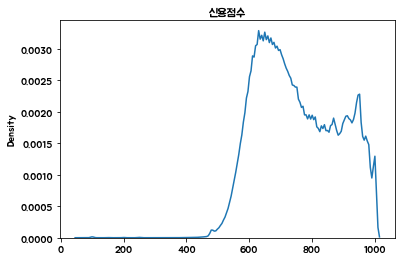

In [24]:
#신용점수 분포도
x = merge['credit_score'].values

sns.kdeplot(x)
plt.title('신용점수')
plt.show()

In [25]:
#데이터 상관관계
merge.corr()

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
application_id,1.000000,-0.000551,0.000170,-0.000101,0.000107,0.000415,-0.001705,-0.001916,0.001533,-0.000543,0.001039,0.001905,0.001392,0.000132,-0.000606,-0.001147,-0.000044,0.000707
bank_id,-0.000551,1.000000,0.138356,-0.009942,-0.139490,0.015787,0.000119,0.006946,0.009417,-0.009510,-0.001432,-0.022785,-0.000120,-0.012638,0.004033,-0.000496,0.014170,0.021671
product_id,0.000170,0.138356,1.000000,0.002529,-0.124230,0.034671,-0.000021,0.009024,0.014833,0.016169,-0.003741,0.007654,-0.000508,-0.003672,0.002758,-0.001563,-0.004384,0.009798
loan_limit,-0.000101,-0.009942,0.002529,1.000000,-0.017229,-0.029384,0.000748,-0.011289,0.020917,0.074132,0.022731,0.003603,0.015317,0.023500,-0.001952,0.005898,-0.028629,-0.001905
loan_rate,0.000107,-0.139490,-0.124230,-0.017229,1.000000,-0.052392,-0.001444,0.000274,0.007371,-0.245056,-0.007296,-0.005408,-0.031584,-0.045271,-0.002637,-0.004003,0.091244,-0.053759
is_applied,0.000415,0.015787,0.034671,-0.029384,-0.052392,1.000000,0.000225,0.010687,-0.012281,-0.176748,-0.006184,0.027242,-0.027016,-0.055566,0.017199,0.005190,0.080327,-0.024910
user_id,-0.001705,0.000119,-0.000021,0.000748,-0.001444,0.000225,1.000000,0.004200,0.006233,0.007925,0.007387,0.002633,0.004734,-0.004372,-0.001760,-0.003120,-0.003855,0.003029
birth_year,-0.001916,0.006946,0.009024,-0.011289,0.000274,0.010687,0.004200,1.000000,0.005142,0.000873,-0.056615,0.002562,-0.008217,0.062552,-0.018697,-0.059100,-0.102841,-0.118321
gender,0.001533,0.009417,0.014833,0.020917,0.007371,-0.012281,0.006233,0.005142,1.000000,0.069946,0.029869,-0.002785,0.024352,0.036874,-0.004597,0.015461,0.027344,0.129528
credit_score,-0.000543,-0.009510,0.016169,0.074132,-0.245056,-0.176748,0.007925,0.000873,0.069946,1.000000,0.057338,0.031030,0.094002,0.196756,-0.040541,-0.012357,-0.216853,0.173511


<AxesSubplot:>

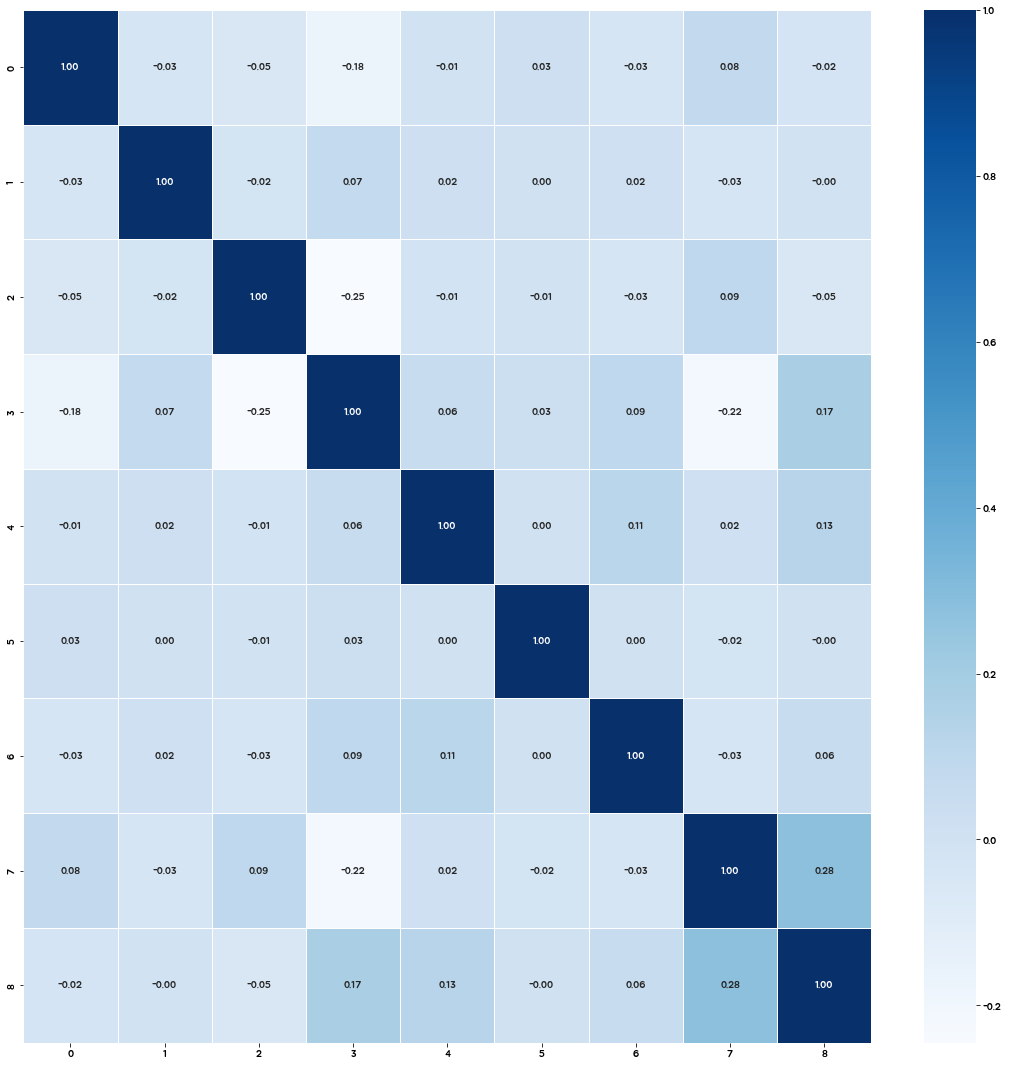

In [26]:
#데이터 히트맵분석
col_names = ["is_applied", "loan_limit","loan_rate","credit_score","yearly_income","company_enter_month","desired_amount","existing_loan_cnt","existing_loan_amt"]
corr = merge[col_names].corr()
plt.figure(figsize=(19, 19))
sns.heatmap(data=corr.values, annot=True, fmt='.2f', linewidth=.5, cmap='Blues')

In [27]:
#근로개월 계산을 위한 입사연월 포맷화
merge_df.loc[merge_df['company_enter_month'] > 10000000, 'company_enter_month'] = round(merge_df['company_enter_month']/100)

In [28]:
#입사연월 카운트
merge_df['company_enter_month'].value_counts()

202201.0    517411
202112.0    419945
202111.0    411403
202110.0    383568
202202.0    336795
             ...  
191601.0         1
198402.0         1
197910.0         1
197701.0         1
198311.0         1
Name: company_enter_month, Length: 534, dtype: int64

In [30]:
#신청일자를 사용하기 위한 전처리 과정
def date_to_num(x):
  if str(x).find("-") != -1 :
    return str(x).split("-")[0] + str(x).split("-")[1]
  return str(x)

In [31]:
#신청일자 전처리
merge_df['loanapply_insert_time'] = merge_df['loanapply_insert_time'].apply(date_to_num)
merge_df['loanapply_insert_time'].value_counts()

202205    3579966
202204    3427278
202203    3262767
202206    3257239
Name: loanapply_insert_time, dtype: int64

In [32]:
#입사연월과 신청일자를 사용하기 위한 전처리 과정
def year_to_mon(x, y):
    return ((round(pd.to_numeric(y)/100 - x/100))*12 + (pd.to_numeric(y)%100 - x%100))

In [ ]:
#입사연월과 신청일자를 이용한 근로개월 수 계산
merge_df['company_enter_month'] = year_to_mon(merge_df['company_enter_month'], merge_df['loanapply_insert_time'])

In [ ]:
#근로개월 수 파악
merge_df['company_enter_month'].value_counts()

In [ ]:
merge_df

In [ ]:
#csv파일 저장
merge_df.to_csv("merge_df.csv", index=False)